# Pima Indians Diabetes Classification
`sklearn` 결정 트리를 이용한 분류
## 데이터 셋 출처
- [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
### 사용 라이브러리


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

### Data Load

In [2]:
df_pima = pd.read_csv("http://bit.ly/data-diabetes-csv")

### EDA
##### 데이터 형태 출력

In [3]:
df_pima.shape

(768, 9)

##### 데이터 SAMPLE을 5개만 출력해 봅니다
샘플의 경우, 랜덤하게 출력되다보니 기존 출력값과 값이 다를 수 있습니다

In [4]:
df_pima.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
139,5,105,72,29,325,36.9,0.159,28,0
417,4,144,82,32,0,38.5,0.554,37,1
264,4,123,62,0,0,32.0,0.226,35,1
621,2,92,76,20,0,24.2,1.698,28,0
274,13,106,70,0,0,34.2,0.251,52,0


데이터 정보를 확인해봅니다

In [5]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


수지형 변수 전체를 히스토그램으로 확인해보세요!  
bin 값은 50으로 설정했었지만, 변경하셔도 상관 없습니다!

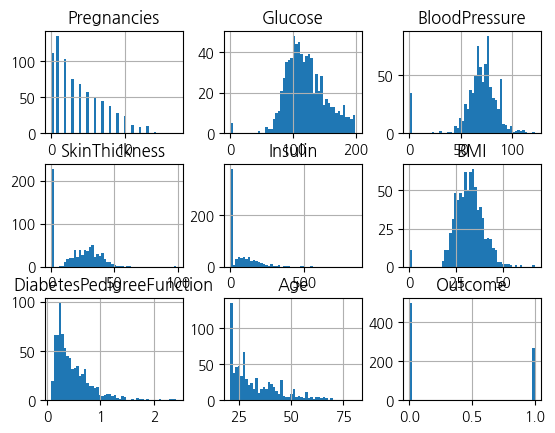

In [6]:
# 글자크기...
# plt.figure(figsize=(15,20))
df_pima.hist(bins=50);

9개의 열을 가진 768개의 데이터


데이터 프레임의 컬럼 정보를 **리스트** 형태로 변환해 출력해주세요

In [7]:
df_pima.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm) -> 체지방 추정용
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0

### 기본적인 학습
히스토그램을 보면, `SkinThickness`와 `Insulin`, `BMI`에 이상치가 있다는 사실을 확인 할 수 있지만,  
일단 전처리를 하지 않은 상태에서 모델 성능 평가를해보고, 이후 하이퍼파라미터 튜닝을 진행하며 차이를 살펴 볼 예정  

지도 학습의 경우 기본적으로 문제의 답을 알려줘야하는데, 해당 데이터 셋에서는 `Outcome`이 답에 해당함

#### Note!
하이퍼파라미터와 파라미터는 다름  
| | Hyperparameter | Parameter |
| :---: | :---: | :---: |
| 설명 | 모델 학습 과정에 반영되는 값 | 모델 내부에서 결정되는 변수 |
| | 학습 전에 조절해야 됨 | 학습 또는 예측되는 값 |
| 예시 | 학습률 | 평균, 표준편차 |
| | 손실함수 | 회귀 계수 |
| | 배치 사이즈 | 가중치, 편향 |
| 조정 여부 | 가능 | 불가 |

하이퍼파라미터의 튜닝 방법은 굉장히 많음

#### 데이터 셋 나누기

In [8]:
# 왜 BMI에 이상치가 있다는 것을 알 수 있지? 히스토그램으로.

split_count = int(df_pima.shape[0]*0.8)
split_count

614

train set과 test set을 인덱싱을 이용해 나눠보세요!

In [15]:
train = df_pima[:split_count]
test = df_pima[split_count:]
train.shape, test.shape

((614, 9), (154, 9))

위에서 나눈 train set과 test set을 다시 학습과 테스트를 위한 데이터로 나눠 보세요!

In [10]:
label_name = "Outcome"

In [16]:
feature_names = df_pima.columns.tolist()
feature_names.remove("Outcome")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [17]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

인덱싱으로 구현한 부분을 사이킷런에 구현된 함수를 이용하면 간편하게 사용 가능합니다!

In [13]:
X = df_pima[feature_names]
y = df_pima[label_name]

In [14]:
# X, y 미리 지정 안하고는 못푸나?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


`train_test_split`은 `sklearn` 내장 메서드로 위 과정을 상단 부분 생략 가능함.  
기본적인 파라미터는,
- `arrays`: 분할시킬 데이터
- `test_size`: 테스트 셋의 비율, `default=0.25`
- `train_size`: 학습 데이터 셋의 비율, `defalut=1-test_size`
- `random_state`
- `shuffle`: 기존 데이터를 나누기 전에 순서를 섞을것인지, `default=True`
- `stratify`: 지정한 데이터의 비율을 유지, 분류 문제의 경우 해당 옵션이 성능에 영향이 있다고는 함

#### 머신러닝 알고리즘 사용
#### 결정 트리 학습법 (Decision Tree Learning)
- 분류와 회귀에 모두 사용 가능한 `CART (Classificaton and Regression Trees)` 알고리즘  
- 어떤 항목에 대한 관측값과 목표값을 연결 시켜주는 예측 모델로서 사용  
  - 분류 트리: 목표 변수가 유한한 수의 값
  - 회귀 트리: 목표 변수가 연속하는 값
- 트리 최상단에는 가장 중요한 질문이 옴
- 결과를 해석(화이트박스 모델)하고 이해하기 쉬움
- 수치 / 범주형 자료에 모두 적용 가능
- 지니 불순도를 이용

#### 결정 트리 학습법 종류
- 랜덤 포레스트
- 부스트 트리
- 회전 포레스트

#### 지니 불순도 (Gini Impurity)
집합에 이질적인 것이 얼마나 섞여는지를 측정하는 지표  
$ I_G(f) = \sum_{i=1}^{m} f_i(1-f_i) $
- 불확실성을 의미 -> 얼마나 많은 것들이 섞여있는가?
- 한가지 특성을 가진 객체만 있을수록 집단을 설명하기 좋음
  - 특성이 동일해질수록 낮아짐
  - 특성이 다양할수록 높아짐


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # 최적의 분할을 위해 고려하는 특성의 개수 (int -> 개수 / float -> 비율)
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 방식
    * max_depth: 트리의 최대 깊이
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수
    * max_leaf_nodes: 리프 노드 숫자의 제한치
    * random_state: 추정기의 무작위성을 제어

In [ ]:
# 머신러닝은 블랙박스라고 하던데, 결정트리만은 화이트박스?

In [18]:
# 사이킷런의 DT(의사결정 트리) 알고리즘을 불러옵니다
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [19]:
# Train
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Test - 예측을 해봅니다
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

#### 트리 알고리즘 분석
plot_tree를 이용해 DT 알고리즘을 시각화 해봅니다  
출력 사이즈는 예시 출력과 달라도 되지만, 크게 설정해서 출력해보세요!

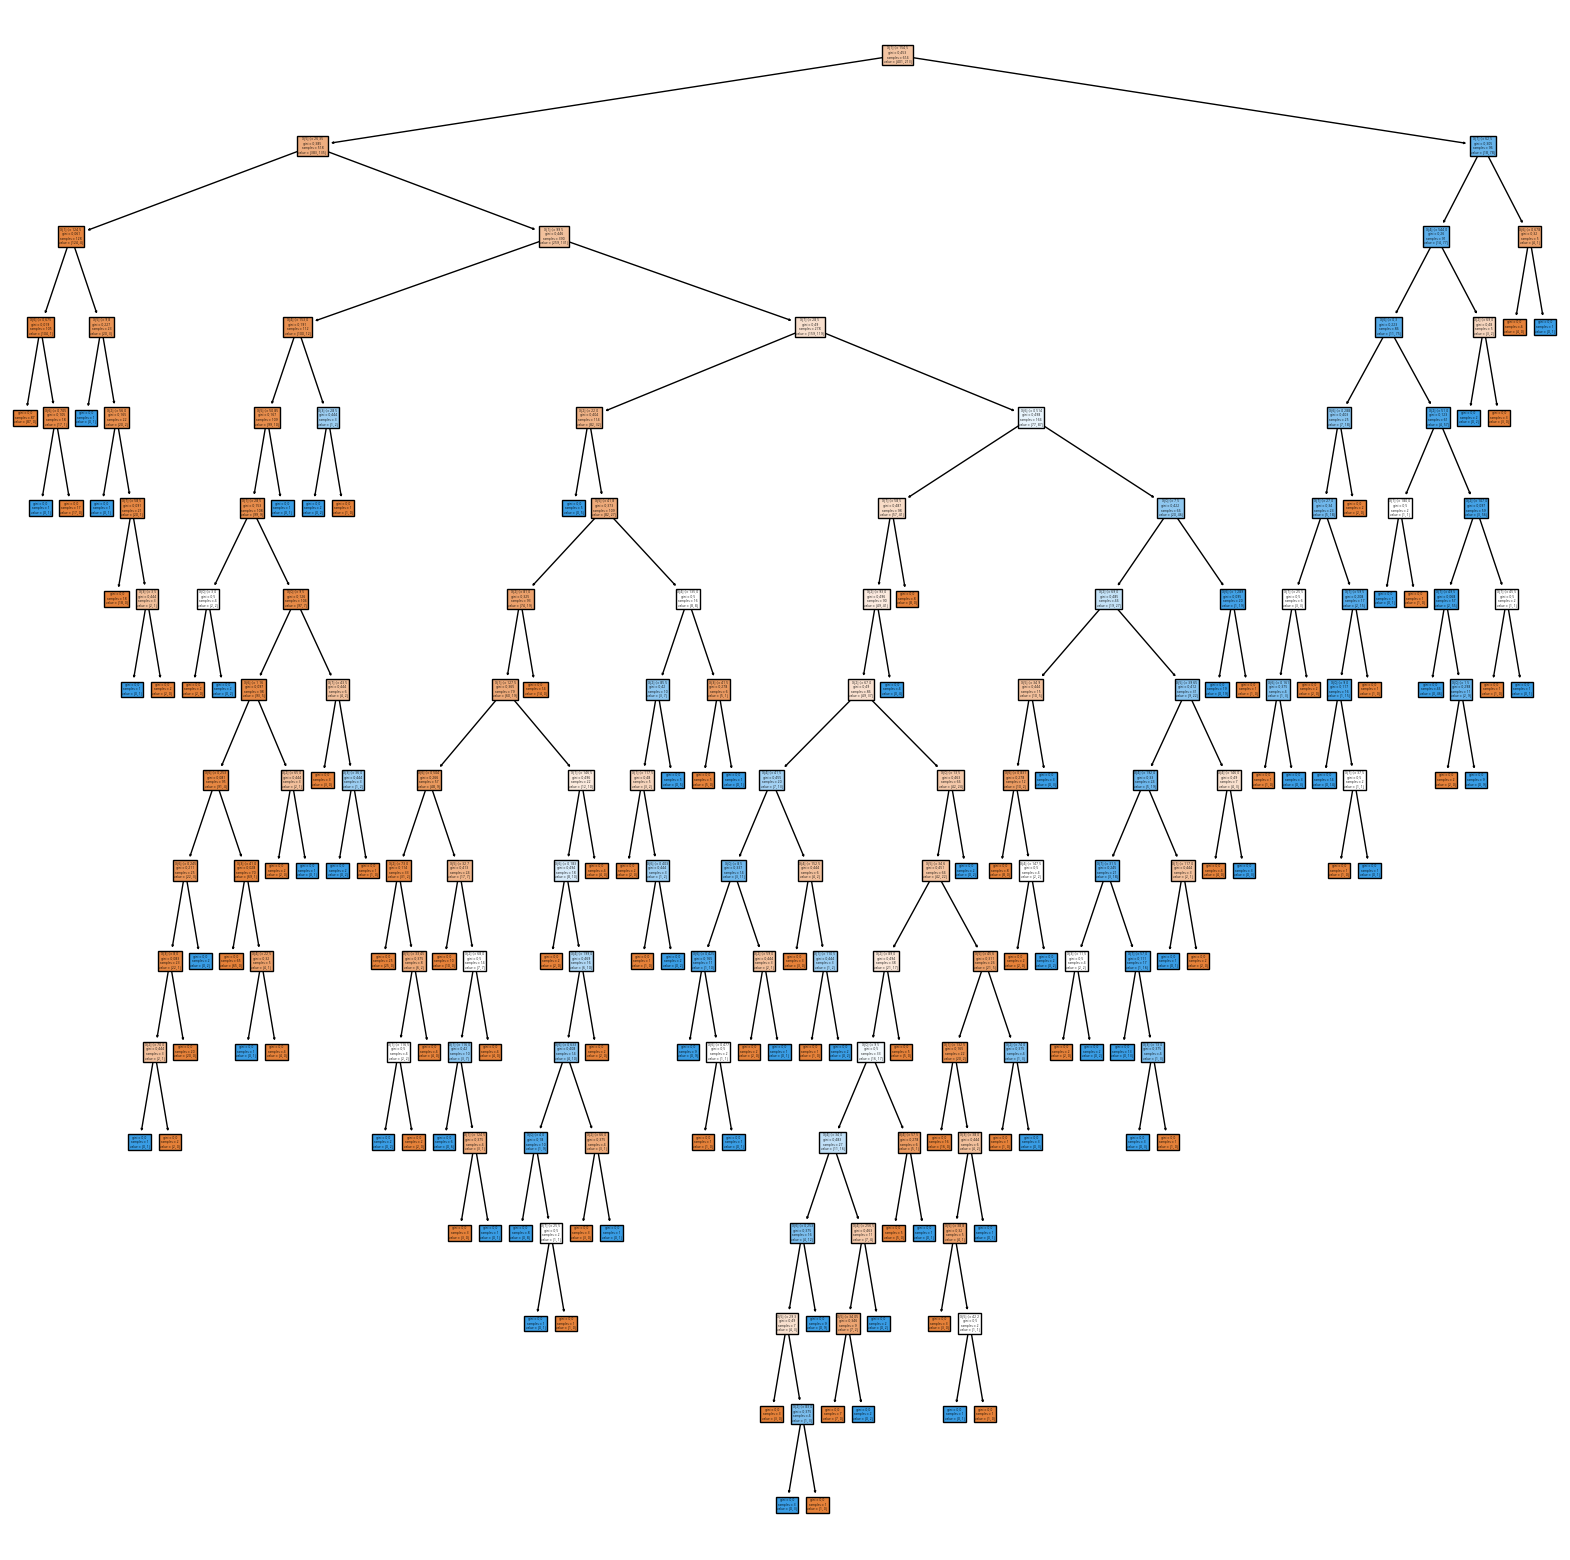

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
ptree = plot_tree(model, filled=True)
plt.show()

지니 계수가 0이되면 트리 생성을 제한하는데, 파라미터 튜닝을 진행하지 않은 상황에서는 16개의 Leaf node가 존재함  
그래프가 크므로 상위 4개 노드만 그려보면,  

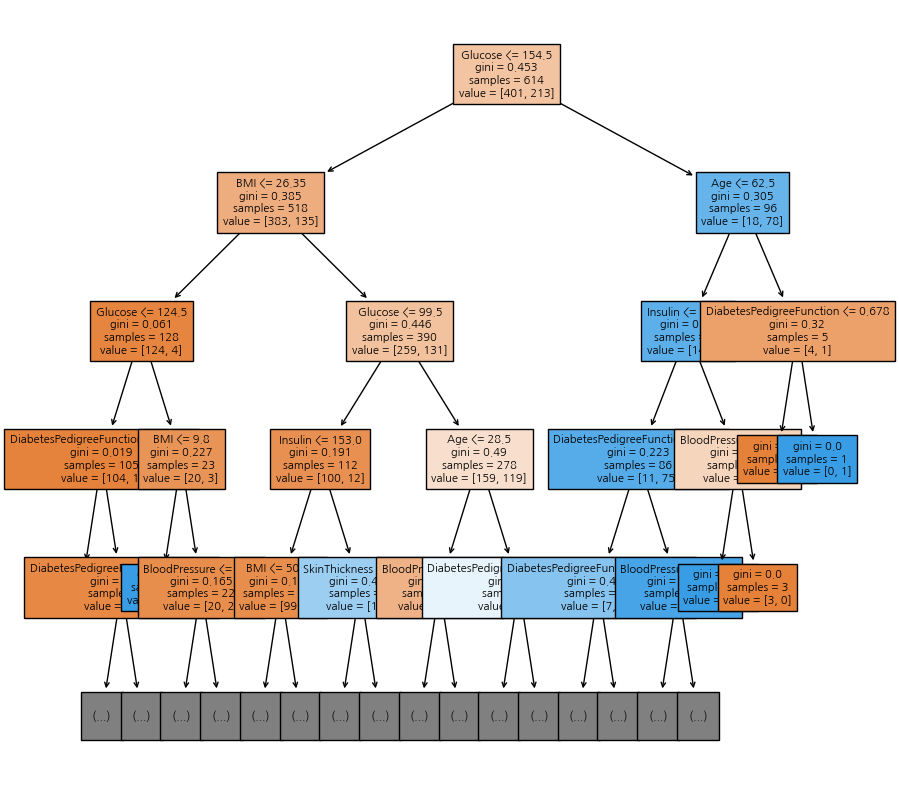

In [22]:
# 상위 4개 노드만 출력 해봅니다

plt.figure(figsize=(10,10))
ptree = plot_tree(model, max_depth=4,
                  feature_names=feature_names, filled=True, fontsize=8)
plt.show()

결정 트리의 최상위에 `Glucose`가 온 것을 확인 할 수 있음  
결정 트리의 최상단에는 가장 중요한 feature가 옴

##### 특성(feature)의 중요도 추출하기

In [23]:
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

In [24]:
# 특성의 중요도의 합을 구해 1이 나오는지 확인 해봅니다
model.feature_importances_.sum()

1.0

<AxesSubplot:>

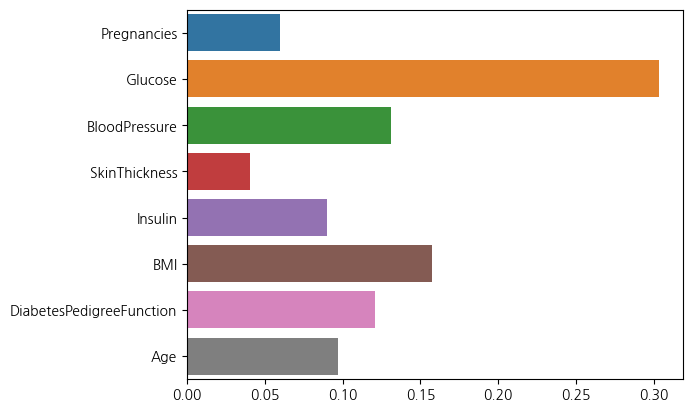

In [25]:
# 특성의 중요도를 시각화 해봅니다
# plt.figure(figzise=(10,10)) 왜 안되지
# Glucose 1등, BMI>BloodPressure> DiabesPedigreeFunction>Age>Insulin>Pregnancies>SkinThickness
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

#### 성능 평가
성능 평가 방식은 다양하나 정확도만을 이용해 성능을 평가함

In [26]:
# 사이킷런에 구현된 기능을 이용하지 말고 직접 정확도를 구해보세요!

(y_test == y_predict).mean()

0.7142857142857143

위와 같은 방식으로 정확도를 구할 수 있지만, `sklearn`의 내장 함수를 사용

In [27]:
# 사이킷런의 내장 함수로 정확도를 구해봅니다!

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7142857142857143

In [28]:
# 모델에서 score를 호출해 정확도를 구해봅니다!
# y_test랑 y_predict랑 비교/ 근데 model.score는 X_test랑 y_test랑 비교?

model.score(X_test, y_test)

0.7142857142857143

### 결정 트리 모델의 하이퍼파라미터 조절
모델을 생성 할 때, 기본적으로 주어지는 피처의 개수나 최대 높이를 제한해 모델을 생성하고 성능을 평가해봄

In [29]:
# 결정 트리 모델의 최대 높이를 4로 제한하고, 고려하는 특성의 비율도 0.8로 조절해서 모델을 생성
# 학습과 예측까지 진행 해보세요!
# 예측값을 y_pre_max4라는 변수에 지정하면 이후 실습에서 코드를 수정하지 않아도 됩니다

# max_features=0.8 ???

model = DecisionTreeClassifier(max_depth = 4, random_state=42, max_features=0.8)
model

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [30]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [31]:
# 예측
y_pre_max4 = model.predict(X_test)
y_pre_max4

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [32]:
# 1차 0.7142857142857143
accuracy_score(y_test, y_pre_max4)

0.7402597402597403

3점 정도의 성능 향상이 있음  
모든 특성을 사용한다고 좋은 성능이 나오는 것은 아님

### Feature Engineering
Garbage In - Garbage Out, 잘 전처리된 데이터를 사용하면 좋은 성능이 나온다는 의미  
실제로 모델을 생성하기 이전에 EDA를 통해, 데이터를 분석하고 전처리하는 과정이 중요함

#### 수치형 변수를 범주형 변수로 만들기
먼저, 임신 횟수를 히스토그램으로 나타내 봅니다

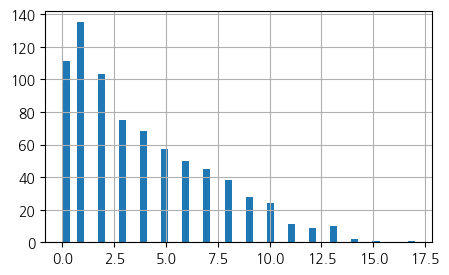

In [33]:
plt.figure(figsize=(5,3))
plt.hist(data=df_pima, x="Pregnancies", bins=50);
plt.grid(True)

임신 횟수를 당뇨병 여부를 기준으로 나타내 봅니다

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

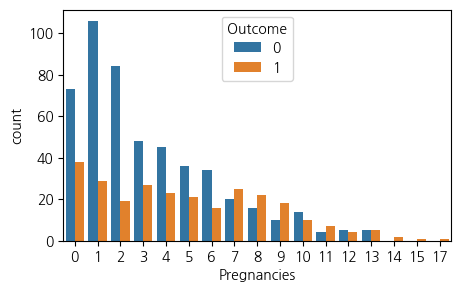

In [34]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_pima, x="Pregnancies", hue="Outcome")

Pima 인디언 데이터 셋에서 `Pregnancies`의 경우 3회 미만인 경우가 대부분임  
0 ~ 17까지 수치형 범주지만, 범주형 변주로 바꾸는 피쳐 엔지니어링을 진행함 -> 임신 횟수 6회를 기준으로 범주형으로 전환

In [35]:
df_pima["Pregnancies_high"] = df_pima["Pregnancies"]>6
df_pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


In [36]:
df_pima.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high']

In [37]:
# 피쳐 엔지니어링을 통해 아래 값과 동일하게 feature_name 변수에 리스트 형식으로 저장합니다
feature_names = df_pima.columns.to_list()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [ ]:
# DT를 이용해 학습과 예측을 진행해보세요!
# 해당 예측값을 y_pre_max4_Pre_high에 저장하면 이후 실습에서 코드를 수정하지 않아도 됩니다

# DT를 이용...? 아, 결정트리..

In [38]:
split_count=int(df_pima.shape[0]*0.8)
split_count

614

In [39]:
train = df_pima[:split_count]
test=df_pima[split_count:]
train.shape, test.shape

((614, 10), (154, 10))

In [40]:
X_train=train[feature_names]
y_train=train[label_name]
X_test=test[feature_names]
y_test=test[label_name]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [41]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [42]:
y_pre_max4_Pre_high = model.predict(X_test)
y_pre_max4_Pre_high

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [43]:
# 1차 0.7142857142857143
# 2차 0.7402597402597403
accuracy_score(y_test, y_pre_max4_Pre_high)

0.7727272727272727

같은 모델에서, 하나의 특성만 수치형에서 범주형으로 변경했는데 3점 정도의 성능 향상이 있었음

#### 결측치 처리하기
먼저, `Insulin`의 값을 히스토그램으로 시각화 해봅니다

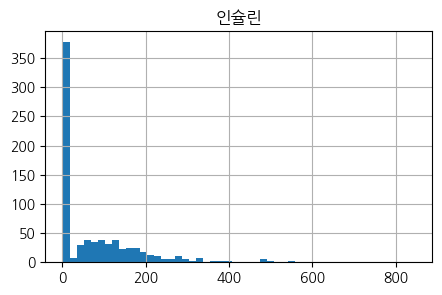

In [44]:
plt.figure(figsize=(5,3))
plt.hist(data=df_pima, x="Insulin", bins=50);
plt.title("인슐린")
plt.grid(True)

`Insulin` 항목의 경우 0으로 기입된 결측치가 많이 존재함

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

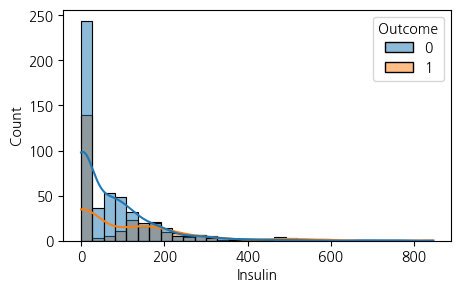

In [45]:
# Outcome을 기준으로, Insulin의 값을 구분해 KDE와 함께 시각화 해봅니다
plt.figure(figsize=(5,3))
sns.histplot(data=df_pima, x="Insulin", hue="Outcome", kde=True)

`seaborn hist`에서 `kde(밀도 추정)`을하면 해당 레이블의 밀도를 확인 가능함

`Insulin` 항목에서 약 48%의 결측치가 존재함  
결측치를 해결하는 방법은 여러가지가 존재하지만, 중앙값으로 대체하는 방식과 평균값으로 보완 두 가지 방식으로 진행

In [46]:
# groupby를 통해 인슐린의 통계값을 구해보세요!
df_pima.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


In [47]:
feature_names.remove("Insulin") # 기존 인슐린 값
feature_names.append("Insulin_filled") # 결측치를 보완한 인슐린 값

##### 중앙값 사용
중앙값을 이용해 결측치를 채워 봅니다

In [48]:
df_pima["Insulin_filled"] = df_pima["Insulin"].replace(0,np.nan)

In [49]:
Insulin_median = df_pima.groupby("Outcome")["Insulin_filled"].median()
Insulin_median

Outcome
0    102.5
1    169.5
Name: Insulin_filled, dtype: float64

In [50]:
df_pima.loc[(df_pima["Outcome"]==0)&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_median[0]
df_pima.loc[(df_pima["Outcome"]==1)&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_median[1]

In [51]:
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_filled
0,6,148,72,35,0,33.6,0.627,50,1,False,169.5
1,1,85,66,29,0,26.6,0.351,31,0,False,102.5
2,8,183,64,0,0,23.3,0.672,32,1,True,169.5
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,180.0
764,2,122,70,27,0,36.8,0.340,27,0,False,102.5
765,5,121,72,23,112,26.2,0.245,30,0,False,112.0
766,1,126,60,0,0,30.1,0.349,47,1,False,169.5


In [52]:
# 결측치를 채운 데이터를 바탕으로 학습과 예측을 진행해봅니다
# 예측값을 y_pre_max4_50_per로 지정하면 이후 실습에서 코드를 수정 할 필요가 없습니다
split_count = int(df_pima.shape[0]*0.8)
split_count

614

In [53]:
train = df_pima[:split_count]
test = df_pima[split_count:]
train.shape, test.shape

((614, 11), (154, 11))

In [54]:
feature_names = df_pima.columns.tolist()
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names.remove("Insulin")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled']

In [55]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [56]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [57]:
y_pre_max4_50_per = model.predict(X_test)
y_pre_max4_50_per

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [58]:
# 1차 0.7142857142857143
# 2차 0.7402597402597403
# 3차 0.7727272727272727

# 답은 0.8896103896103896

accuracy_score(y_test, y_pre_max4_50_per)

0.8961038961038961

중앙값으로 `Insulin`의 결측치를 대체한 경우 약 11점 정도의 성능 향상이 있음

##### 평균값 사용
평균값을 이용해 결측치를 채워 봅니다

In [59]:
df_pima["Insulin_filled"] = df_pima["Insulin"]

In [60]:
df_pima["Insulin_filled"] = df_pima["Insulin"].replace(0,np.nan)

In [61]:
Insulin_mean = df_pima.groupby("Outcome")["Insulin"].mean()
Insulin_mean

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

In [62]:
df_pima.loc[(df_pima["Outcome"]==0)&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_mean[0]
df_pima.loc[(df_pima["Outcome"]==1)&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_mean[1]

In [63]:
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_filled
0,6,148,72,35,0,33.6,0.627,50,1,False,100.335821
1,1,85,66,29,0,26.6,0.351,31,0,False,68.792000
2,8,183,64,0,0,23.3,0.672,32,1,True,100.335821
3,1,89,66,23,94,28.1,0.167,21,0,False,94.000000
4,0,137,40,35,168,43.1,2.288,33,1,False,168.000000
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,180.000000
764,2,122,70,27,0,36.8,0.340,27,0,False,68.792000
765,5,121,72,23,112,26.2,0.245,30,0,False,112.000000
766,1,126,60,0,0,30.1,0.349,47,1,False,100.335821


In [64]:
train = df_pima[:split_count]
test = df_pima[split_count:]
train.shape, test.shape

((614, 11), (154, 11))

In [65]:
feature_names = df_pima.columns.tolist()
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names.remove("Insulin")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled']

In [66]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [67]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [68]:
# 결측치를 채운 데이터를 바탕으로 학습과 예측을 진행해봅니다
# 예측값을 y_pre_max4_mean로 지정하면 이후 실습에서 코드를 수정 할 필요가 없습니다
y_pre_max4_mean = model.predict(X_test)
y_pre_max4_mean

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [69]:
# 1차 0.7142857142857143
# 2차 0.7402597402597403
# 3차 Pregnancies_hight : 0.7727272727272727
# 4차 Insulin_median : 0.8961038961038961
# 5차 Insulin_mean : 0.8506493506493507

accuracy_score(y_test, y_pre_max4_mean)

0.8506493506493507

`Insulin`의 결측치를 처리하기 이전보다는 약 8점 정도의 성능 향상이 있지만, 중앙값으로 대체한 경우보다는 성능이 3점 정도 낮음

#### 이상치(Outlier)
결측치 처리를 2가지 방식으로 했지만, 이상치를 분석하는 과정은 **평균**으로 처리한 경우를 다룸

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_filled'>

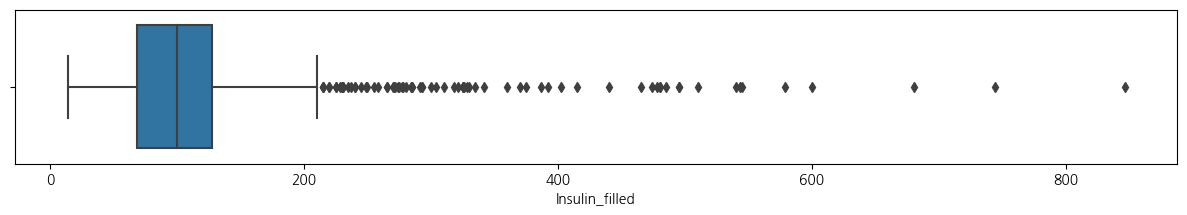

In [70]:
# 인슐린의 결측치를 평균값으로 처리한 경우의 이상치를 시각화 해봅니다
plt.figure(figsize=(15, 2))
sns.boxplot(df_pima["Insulin_filled"])

In [71]:
# 통계값을 구해봅니다
# 평균 118.967780
# 75% 127.250000
df_pima["Insulin_filled"].describe()

count    768.000000
mean     118.967780
std       93.557899
min       14.000000
25%       68.792000
50%      100.000000
75%      127.250000
max      846.000000
Name: Insulin_filled, dtype: float64

<AxesSubplot:ylabel='Density'>

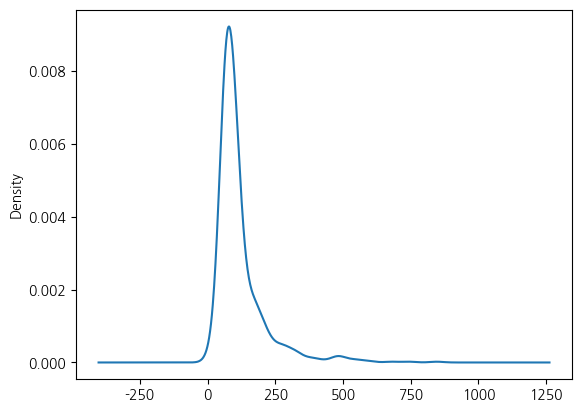

In [72]:
# KDE로 이상치 처리 이전의 값을 시각화 해봅니다
# -250부터 1250까지로 그려진다...
df_pima["Insulin_filled"].plot(kind="kde")

결측치 문제를 해결했지만 이상치의 문제가 있음  
75%가 넘어가는 부분을 평균으로 대체해줌

In [73]:
# 평균 118.967780
# 75% 127.250000
desc = df_pima["Insulin_filled"].describe()
desc

count    768.000000
mean     118.967780
std       93.557899
min       14.000000
25%       68.792000
50%      100.000000
75%      127.250000
max      846.000000
Name: Insulin_filled, dtype: float64

In [74]:
# 75% 넘는 데이터(192,11)
# Outcome 0일 때, 68.792000, 1일때 100.335821
df_pima[df_pima["Insulin_filled"] > desc["75%"]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_filled
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0
8,2,197,70,45,543,30.5,0.158,53,1,False,543.0
13,1,189,60,23,846,30.1,0.398,59,1,False,846.0
14,5,166,72,19,175,25.8,0.587,51,1,False,175.0
16,0,118,84,47,230,45.8,0.551,31,1,False,230.0
...,...,...,...,...,...,...,...,...,...,...,...
740,11,120,80,37,150,42.3,0.785,48,1,True,150.0
744,13,153,88,37,140,40.6,1.174,39,0,True,140.0
748,3,187,70,22,200,36.4,0.408,36,1,False,200.0
753,0,181,88,44,510,43.3,0.222,26,1,False,510.0


In [75]:
df_pima.loc[(df_pima["Outcome"]==0)&(df_pima["Insulin_filled"] > desc["75%"]), "Insulin_filled"] = Insulin_mean[0]
df_pima.loc[(df_pima["Outcome"]==1)&(df_pima["Insulin_filled"] > desc["75%"]), "Insulin_filled"] = Insulin_mean[1]

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '이상치 처리 후')

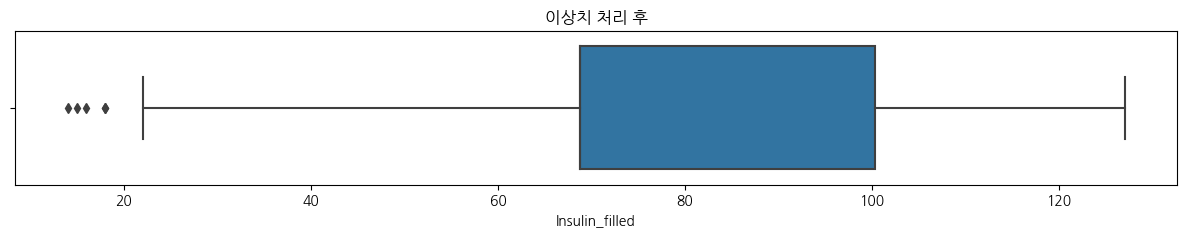

In [76]:
# 이상치 처리 후 값을 시각화 해봅니다
plt.figure(figsize=(15, 2))
sns.boxplot(df_pima["Insulin_filled"])
plt.title("이상치 처리 후")

<AxesSubplot:ylabel='Density'>

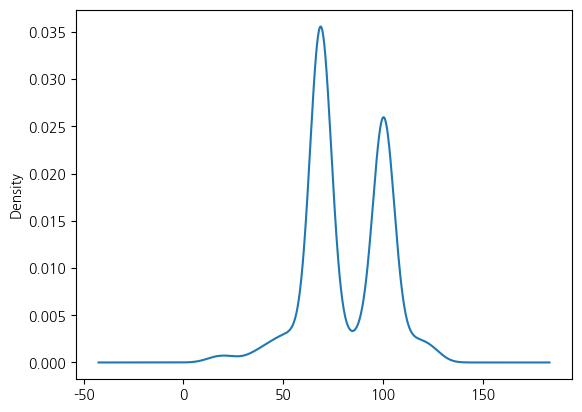

In [77]:
# 이상치 처리 후 값을 시각화 해봅니다
df_pima["Insulin_filled"].plot(kind="kde")

In [ ]:
# 이상치를 처리한 이후에 DT 알고리즘으로 학습과 예측을 해봅니다
# 예상값을 y_pre_max4_mean_out 변수에 저장하면 이후 실습에서 코드를 수정 할 필요가 없습니다

In [78]:
train = df_pima[:split_count]
test = df_pima[split_count:]
train.shape, test.shape

((614, 11), (154, 11))

In [79]:
feature_names = df_pima.columns.tolist()
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names.remove("Insulin")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled']

In [80]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [81]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [82]:
y_pre_max4_mean_out = model.predict(X_test)
y_pre_max4_mean_out

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [83]:
# 정답은 0.8441558441558441

accuracy_score(y_test, y_pre_max4_mean_out)

0.922077922077922

이상치를 처리한 후에 성능이 조금 떨어졌음  
통계를 기반으로하는 이상치 처리는 위험할 수도 있음  
효과적인 이상치 탐색을 위해서는 해당 데이터 변수들의 의미와 도메인을 이해하고 원인을 파악하고 처리해야 됨

### Overfitting과 Underfitting
해당 개념도 다뤄보고 싶은데, 사용한 데이터 셋의 크기가 작은 편이라 마땅한 방식을 생각하지 못해 개념만 소개하고 넘어가는걸로..  

##### Overfitting (과적합)
Train 데이터에 과하게 영향을 받아, 훈련 평가 성능은 좋으나 테스트 평가 성능이 낮은 경우

##### Underfitting (과소적합)
Train 데이터의 양이 적어 학습을 제대로하지 못한 경우  

![img](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

[이미지 출처: scikit learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)